# Midterm Project

Ahmed Mahmoud Fawzi - 1170523

Amira Ahmed Noman - 1170400

Rawda Ahmed Ramah - 1170448

# Imports

In [18]:
# %matplotlib notebook
import matplotlib.pyplot as plt
import pydicom as dicom
import matplotlib.pylab as plt
import numpy as np
from skimage import data, img_as_float
from skimage import exposure
import cv2
from skimage import color
import math
from PIL import Image, ImageEnhance

# Read the Dicom Image

(4096, 3328)


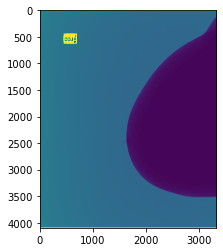

In [19]:
image_path = r"D:\Senior2-Fall\CV\midterm\MAMMOGRAPHY_RAW.dcm"
ds = dicom.dcmread(image_path)
image=ds.pixel_array
print(image.shape)
plt.imshow(image)

# Log Transformation

In [20]:
# log transform and mapping the gray levels from 0-16383 to 0-4095
c = 4095/np.log(1 + np.max(image))
log_image = c * (np.log(image + 1))
log_image = np.array(log_image, dtype = np.uint16)

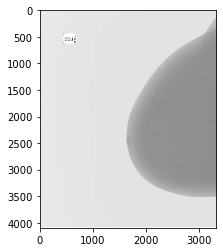

In [21]:
plt.imshow(log_image,cmap='gray')

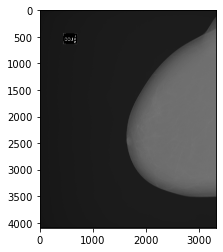

In [22]:
# Inverting the colors ( black-white and white-black)
log_image=np.max(log_image)-log_image
plt.imshow(log_image,cmap='gray')

# Histogram Equalization 

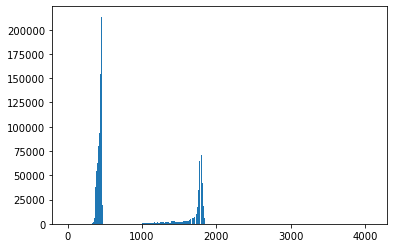

In [23]:
# Plotting the Histogram to see the majority of the gray levels
flat=log_image.flatten()
plt.hist(flat,bins=4096);

In [24]:
# To avoid bright regions around the breast 
# This step will help later during the histogram equalization
log_image[log_image<=1000]=0                     

In [25]:
# Histogram Equalization to enhance the image contrast
new_arr=exposure.equalize_hist(log_image, nbins=4096, mask=None)

In [26]:
# Remapping the values to 0-4095
new_arr = ((new_arr - new_arr.min()) * (1/(new_arr.max() - new_arr.min()) * 4095)).astype('uint16')

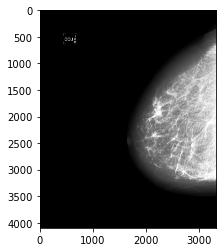

In [27]:
plt.imshow(new_arr,cmap='gray')